# Лабораторная 6.  Логистическая регрессия

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Устанавливаем сид для воспроизводимости

In [2]:
seed = 373440 # ИСУ

# Загружаем датасет

In [3]:
train_data = pd.read_csv('data/train.csv')
test_data = pd.read_csv('data/test.csv')

train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## Предварительная обработка данных

In [7]:
# Замена пропусков в возрасте средним значением
train_data['Age'] = train_data['Age'].fillna(train_data['Age'].mean())

# Преобразование категориальных переменных в числовые
train_data['Sex'] = train_data['Sex'].map({'male': 0, 'female': 1})
train_data['Embarked'] = train_data['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})

# Удаляем ненужные столбцы
train_data.drop(['Name', 'Ticket', 'Cabin', 'PassengerId'], axis=1, inplace=True)

# Проверка на наличие пропусков после обработки
train_data.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

## Визуализация статистики по датасету

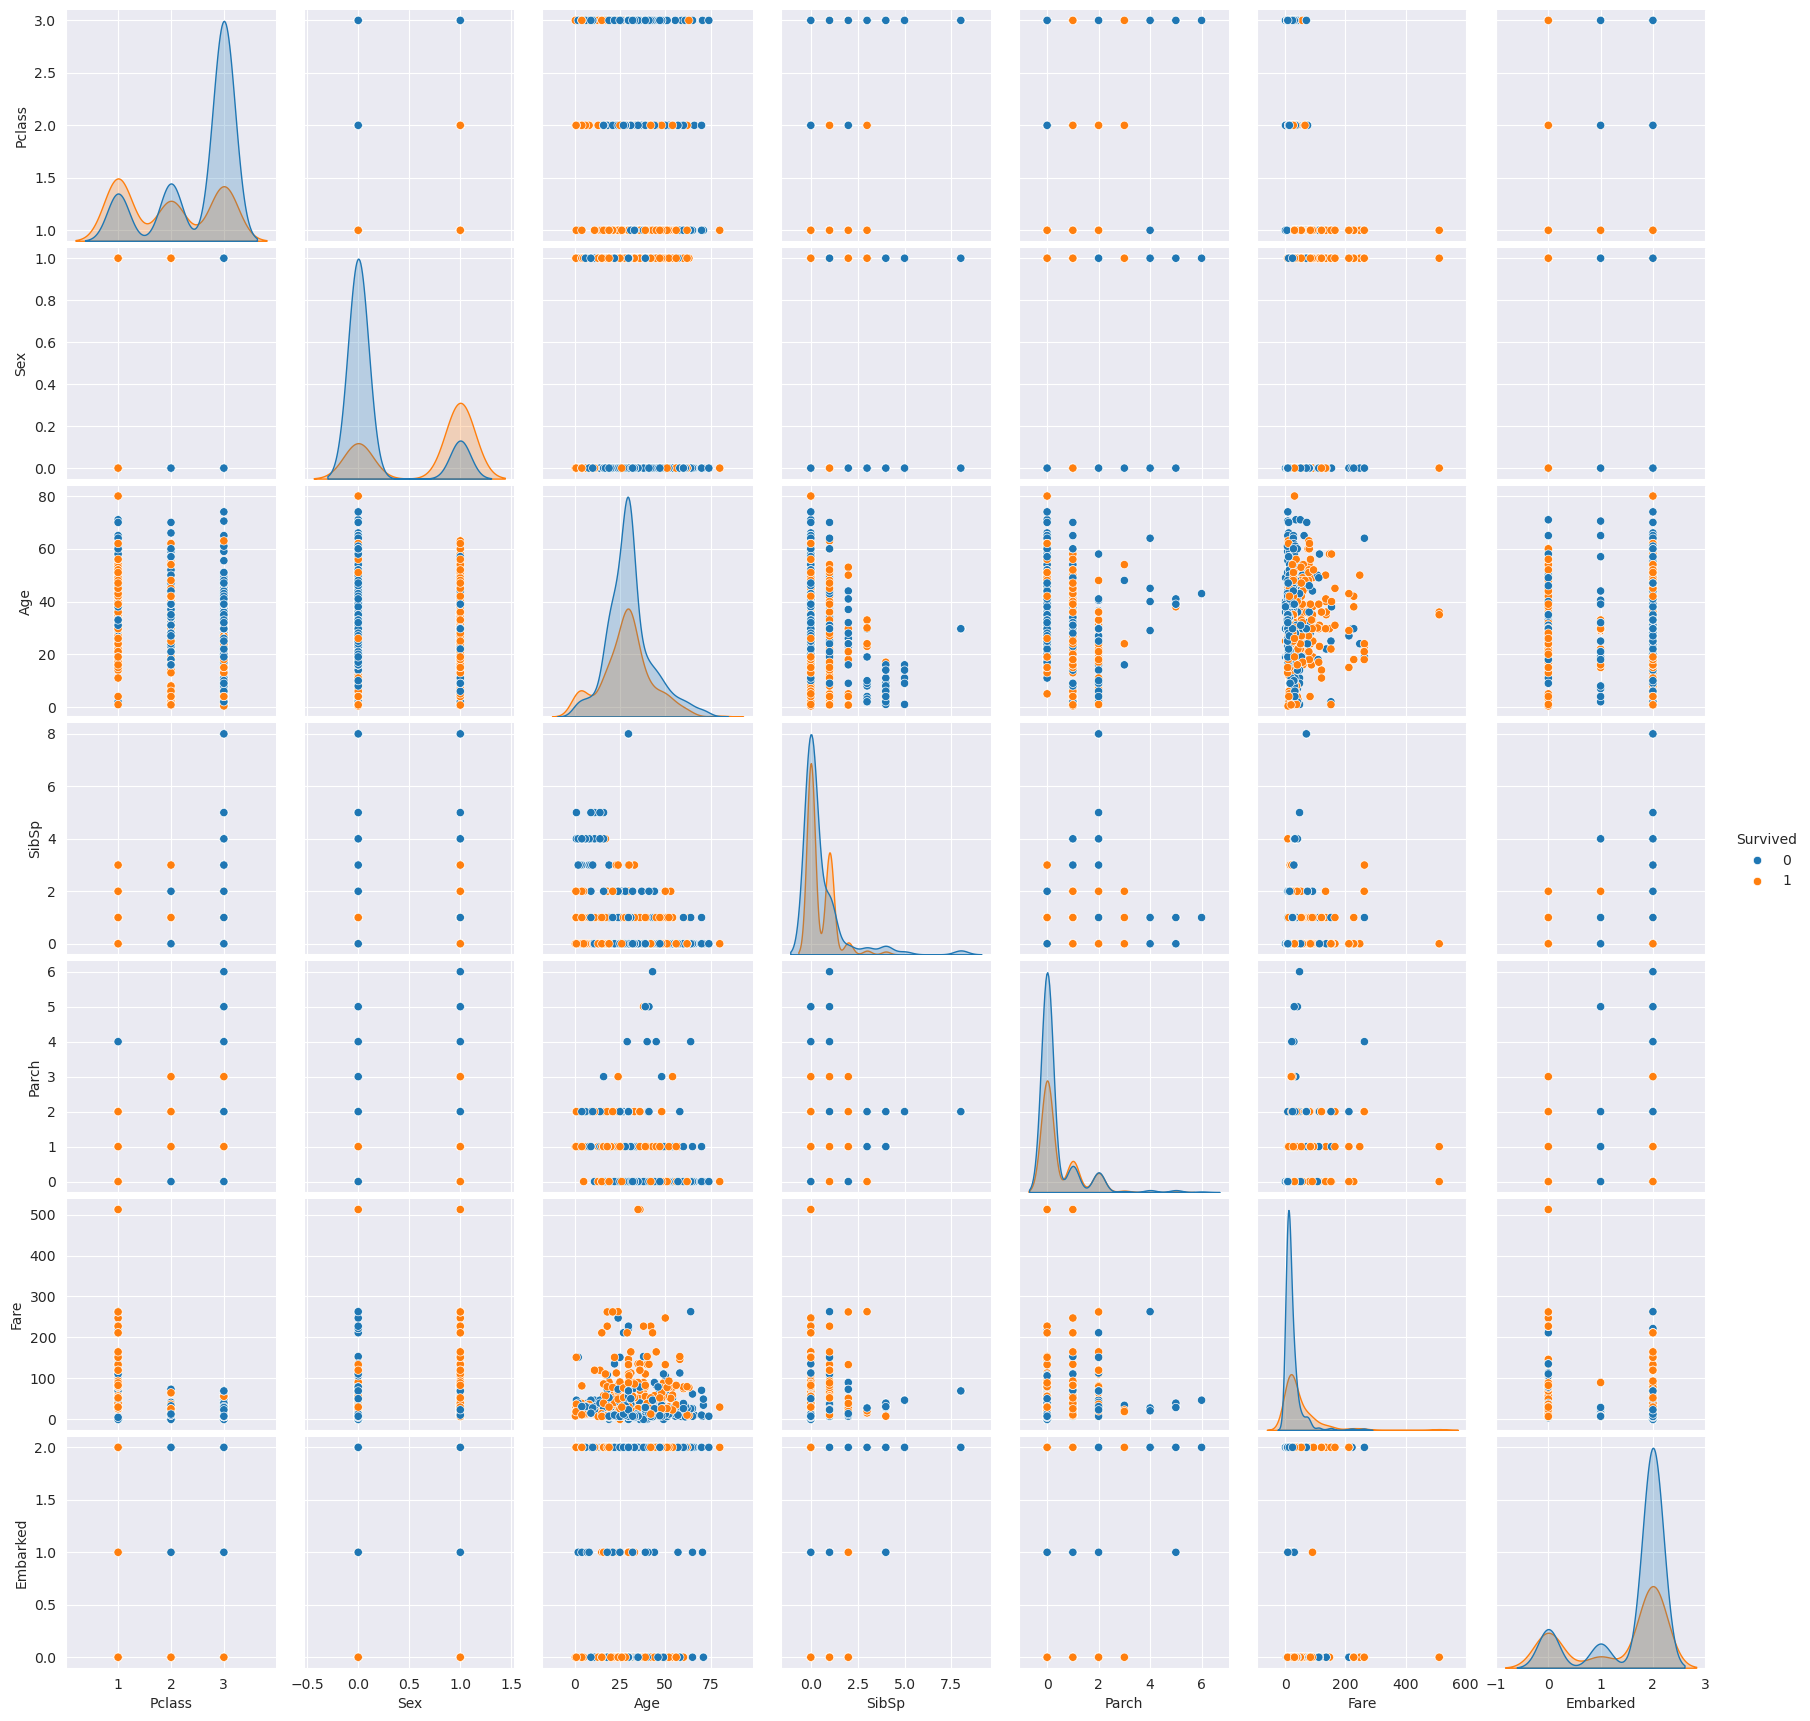

In [8]:
sns.pairplot(train_data, hue='Survived')
plt.show()

## Разделение данных на обучающий и тестовый наборы

In [9]:
# Разделение данных на признаки и целевую переменную
X = train_data.drop('Survived', axis=1)
y = train_data['Survived']

# Разделение на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)

print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)

X_train shape: (712, 7)
X_test shape: (179, 7)
y_train shape: (712,)
y_test shape: (179,)


## Реализация логистической регрессии

In [10]:
class LogisticRegression:
    def __init__(self, learning_rate=0.01, num_iterations=1000, optimizer='gd'):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.weights = None
        self.bias = None
        self.optimizer = optimizer

    # Сигмоидная функция
    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def gradient_descent(self, x, n_samples, y, predictions):
        dw = (1 / n_samples) * np.dot(x.T, (predictions - y))
        db = (1 / n_samples) * np.sum(predictions - y)
        self.weights -= self.learning_rate * dw
        self.bias -= self.learning_rate * db

    def gradient(self, x, y, n_samples):
        sigmoid_probs = self.sigmoid(np.dot(x, self.weights) + self.bias)
        return (1 / n_samples) * np.dot(x.T, (sigmoid_probs - y))

    def fit(self, x, y):
        n_samples, n_features = x.shape
        self.weights = np.random.rand(n_features) * 0.01  # Инициализация маленькими случайными значениями
        self.bias = 0

        # Проверка на наличие бесконечных и пропущенных значений
        if np.any(np.isnan(x)) or np.any(np.isinf(x)) or np.any(np.isnan(y)) or np.any(np.isinf(y)):
            raise ValueError("Данные содержат пропущенные или бесконечные значения.")

        # Обучение модели
        for i in range(self.num_iterations):
            linear_model = np.dot(x, self.weights) + self.bias
            y_predicted = self.sigmoid(linear_model)

            if self.optimizer == 'gd':
                self.gradient_descent(x, n_samples, y, y_predicted)
                if i % 100 == 0:
                    _loss = self.loss(y_predicted, y)
                    print(f"Iteration {i}: Cost = {_loss}")

            elif self.optimizer == 'newton':
                grad = self.gradient(x, y, n_samples)
                sigmoid_probs = self.sigmoid(np.dot(x, self.weights) + self.bias)
                hess = (1 / n_samples) * np.dot(x.T, np.dot(np.diag(sigmoid_probs * (1 - sigmoid_probs)), x))
                H_inv = np.linalg.inv(hess)
                delta = np.dot(H_inv, grad)
                self.weights -= delta
                if i % 100 == 0:
                    _loss = self.loss(y_predicted, y)
                    print(f"Iteration {i}: Cost = {_loss}")

    # Функция потерь
    def loss(self, y_pred, y_true):
        # Избегаем log(0) с помощью np.clip
        y_pred = np.clip(y_pred, 1e-15, 1 - 1e-15)
        loss_ = -(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))
        return np.mean(loss_)

    def predict(self, x):
        linear_model = np.dot(x, self.weights) + self.bias
        y_predicted = self.sigmoid(linear_model)
        y_predicted_cls = [1 if i > 0.5 else 0 for i in y_predicted]
        return np.array(y_predicted_cls)

## Обучение модели и оценка производительности

In [11]:
print("Проверка на пропущенные значения:")
print("X_train:")
print(X_train.isnull().sum())
print("y_train:")
print(pd.Series(y_train).isnull().sum())

print("Проверка на бесконечные значения:")
print("X_train:")
print(np.isinf(X_train).sum())
print("y_train:")
print(np.isinf(y_train).sum())

X_train.replace([np.inf, -np.inf], np.nan, inplace=True)
X_train.fillna(X_train.mean(), inplace=True)

# Обучение модели
model = LogisticRegression(learning_rate=0.01, num_iterations=1000)
model.fit(X_train.values, y_train.values)

# Прогнозирование на тестовом наборе
y_pred = model.predict(X_test.values)

# Оценка производительности
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, zero_division=0)
recall = recall_score(y_test, y_pred, zero_division=0)
f1 = f1_score(y_test, y_pred, zero_division=0)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Проверка на пропущенные значения:
X_train:
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64
y_train:
0
Проверка на бесконечные значения:
X_train:
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64
y_train:
0
Iteration 0: Cost = 0.7308437727009864
Iteration 100: Cost = 2.222463516839637
Iteration 200: Cost = 0.9906779802126894
Iteration 300: Cost = 0.9908367690758
Iteration 400: Cost = 2.212929897148125
Iteration 500: Cost = 0.8994530182480046
Iteration 600: Cost = 0.9217238866878624
Iteration 700: Cost = 2.196010544656028
Iteration 800: Cost = 0.8390351760308419
Iteration 900: Cost = 0.8803643674638645
Accuracy: 0.44692737430167595
Precision: 0.4367816091954023
Recall: 0.987012987012987
F1 Score: 0.6055776892430279


## Исследование гиперпараметров

In [12]:
# Исследование гиперпараметров
learning_rates = [0.001, 0.01, 0.1]
num_iterations = [1000, 2000, 5000]
best_accuracy = 0
best_params = {}

for lr in learning_rates:
    for n_iter in num_iterations:
        model = LogisticRegression(learning_rate=lr, num_iterations=n_iter)
        model.fit(X_train.values, y_train.values)
        y_pred = model.predict(X_test.values)

        accuracy = accuracy_score(y_test, y_pred)
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_params = {'learning_rate': lr, 'num_iterations': n_iter}

print(f"Best accuracy: {best_accuracy} with parameters: {best_params}")

Iteration 0: Cost = 0.7303412394542677
Iteration 100: Cost = 0.6164682377246478
Iteration 200: Cost = 0.6124500991158301
Iteration 300: Cost = 0.6087564223775735
Iteration 400: Cost = 0.6053497729041122
Iteration 500: Cost = 0.6021968228479958
Iteration 600: Cost = 0.5992680286847071
Iteration 700: Cost = 0.5965372931863423
Iteration 800: Cost = 0.5939816279121358
Iteration 900: Cost = 0.5915808273646052
Iteration 0: Cost = 0.7208890237232654
Iteration 100: Cost = 0.6167189919181844
Iteration 200: Cost = 0.6126969799803001
Iteration 300: Cost = 0.6089994989971433
Iteration 400: Cost = 0.6055891338625791
Iteration 500: Cost = 0.6024325657890977
Iteration 600: Cost = 0.5995002530668585
Iteration 700: Cost = 0.5967660955275598
Iteration 800: Cost = 0.5942070989072261
Iteration 900: Cost = 0.5918030503630127
Iteration 1000: Cost = 0.5895362124292559
Iteration 1100: Cost = 0.5873910396585368
Iteration 1200: Cost = 0.5853539199581009
Iteration 1300: Cost = 0.5834129410540776
Iteration 1400: 

/tmp/ipykernel_30402/1821205250.py:11: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
/tmp/ipykernel_30402/1821205250.py:11: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


## Заключение

В данной работе была реализована логистическая регрессия с нуля и проведено исследование гиперпараметров.
Наилучшие параметры были найдены, и производительность модели была оценена с использованием различных метрик.